In [58]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, ConfusionMatrixDisplay, accuracy_score

**Loading the dataset and performing some essential data preprocessing (like scaling features)**

In [40]:
# Import the dataset
df = pd.read_csv('../datasets/diabetes.csv')

# Select the features to use (top 4 important features)
X = df[["Glucose", "BloodPressure", "BMI", "Age"]]

# Select the target variable
y = df['Outcome']

# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Fit the scaler to the features and transform them (standardize features to mean=0, std=1)
X = scaler.fit_transform(X) 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42, stratify=y)

print(f"Total samples: {X.shape[0]}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Total samples: 768
Training samples: 614
Testing samples: 154




**First, we will implement the KNN model from scratch and test it on a dataset, recording its results. Then, we will use a ready-made KNN model to compare its accuracy and performance with our own implementation.**


In [42]:
class KNNClassifier:
    def __init__(self, k=3, distance_function = None):
        self.k = k
        if distance_function is None:
            self.distance_function = self._euclidean_distance
        else:
            self.distance_function = distance_function
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return  np.sqrt(np.sum((x1 - x2) ** 2))
    
    def _manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))
    
    def _minkowski_distance(self, x1, x2, p=3):
        return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)
    
    def predict(self, X):
        predictions = []
        for index , x in enumerate(X):
            distances = [self.distance_function(x, x_train) for x_train in self.X_train]

            k_indices = np.argsort(distances)[: self.k]
            k_neighbor_labels = self.y_train.iloc[k_indices]

            counts = np.bincount(k_neighbor_labels.astype(int))
            predicted_label = np.argmax(counts)

            predictions.append(predicted_label)
        return np.array(predictions)

**A model is established and trained using the train-related data**

In [43]:
knn_classifier_scratch = KNNClassifier(k=3)
knn_classifier_scratch.fit(X_train, y_train)

**Now the model is used to make a prediction**

In [44]:
y_pred = knn_classifier_scratch.predict(X_test)

In [51]:
knn_sklearn_model = KNeighborsClassifier(3, metric='euclidean')
knn_sklearn_model.fit(X_train,y_train )

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [52]:
y_pred_sk = knn_sklearn_model.predict(X_test)

**Model comparison between the one which was built from scratch and the one scikit-learn provides**

**How sensitive our model is? from 100 people who has diabetics the model succusfully recognize almost 60 person.**

In [55]:
scratch_recall = recall_score(y_test, y_pred)
sklearn_recall = recall_score(y_test, y_pred_sk)

print(f"Recall(sensitivity) score of the  constructed model: {scratch_recall}\nRecall(sensitivity) score of the  sklearn model: {sklearn_recall}")

Recall(sensitivity) score of the  constructed model: 0.5925925925925926
Recall(sensitivity) score of the  sklearn model: 0.5925925925925926


In [60]:
scratch_acc = accuracy_score(y_test, y_pred)
sklearn_acc= accuracy_score(y_test, y_pred_sk)

print(f"Accuracy score of the  constructed model: {scratch_acc}\nAccuracy score of the  sklearn model: {sklearn_acc}")

Accuracy score of the  constructed model: 0.7337662337662337
Accuracy score of the  sklearn model: 0.7337662337662337


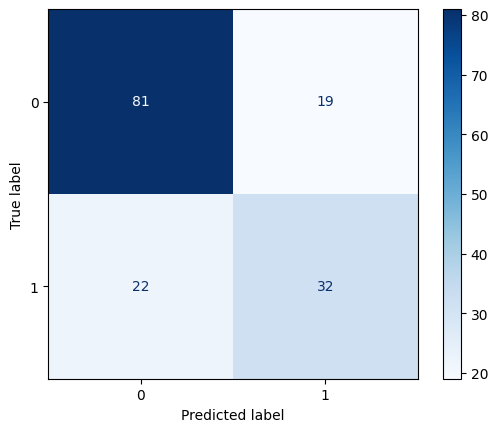

In [63]:
# Suppose y_true and y_pred are your true and predicted labels  
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])  # or your class labels
disp.plot(cmap=plt.cm.Blues)  # or another colormap
plt.show()